![fifa](./logo_fifa.png)

# Ejemplo de simulación numérica

In [87]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc("text", usetex=True)
rc("font", size=18)
rc("figure", figsize=(6,4))
rc("axes", grid=True)

## Problema físico

![esquema](esquema.png)

Definimos un SR con el origen en el orificio donde el hilo atravieza el plano, la coordenada $\hat{z}$ apuntando hacia abajo. Con esto sacamos, de la segunda ley de Newton para las particulas:

$$
\begin{align}
\text{Masa 1)}\quad&\vec{F}_1 = m_1 \vec{a}_1 \\
&-T \hat{r} = m_1 \vec{a}_1 \\
&-T \hat{r} = m_1 \left\{ \left(\ddot{r} - r \dot{\theta}^2\right)  \hat{r} + \left(r\ddot{\theta} + 2\dot{r}\dot{\theta}\right)\hat{\theta} \right\} \\
&\begin{cases}
\hat{r})\ - T = m_1\left( \ddot{r} - r\, \dot{\theta}^2\right)\\
\hat{\theta})\  0 = m_1 \left(r \ddot{\theta} + 2 \dot{r}\dot{\theta}\right)\\
\end{cases}\\
\\
\text{Masa 2)}\quad&\vec{F}_2 = m_2 \vec{a}_2 \\
&-T \hat{z} + m_2 g \hat{z} = m_2 \ddot{z} \hat{z} \\
\implies & \boxed{T = m_2 \left( g - \ddot{z} \right)}\\
\end{align}
$$

Ahora reemplazando este resultado para la tension (que es igual en ambas expresiones) y entendiendo que $\ddot{z} = -\ddot{r}$ pues la soga es ideal y de largo constante, podemos rescribir las ecuaciones obtenidas para la masa 1 como:

$$
\begin{cases}
\hat{r})\quad - m_2 \left( g + \ddot{r} \right) = m_1\left( \ddot{r} - r\, \dot{\theta}^2\right)\\
\\
\hat{\theta})\quad  0 = m_1 \left(r \ddot{\theta} + 2 \dot{r}\dot{\theta}\right)
\end{cases}
\implies
\begin{cases}
\hat{r})\quad  \ddot{r} = \dfrac{- m_2 g + m_1 r \dot{\theta}^2}{m_1 + m_2}\\
\\
\hat{\theta})\quad  \ddot{\theta} = -2 \dfrac{\dot{r}\dot{\theta}}{r}\\
\end{cases}
$$


La gracia de estos métodos es lograr encontrar una expresión de la forma $y'(x) = f(x,t)$ donde x será la solución buscada, aca como estamos en un sistema de segundo orden en dos variables diferentes ($r$ y $\theta$) sabemos que nuestra solución va a tener que involucrar 4 componentes. Es como en el oscilador armónico, que uno tiene que definir posicion y velocidad inicial para poder conocer el sistema, solo que aca tenemos dos para $r$ y dos para $\theta$.

Se puede ver entonces que vamos a necesitar una solucion del tipo:
$$\mathbf{X} = \begin{pmatrix} r \\ \dot{r}\\ \theta \\ \dot{\theta} \end{pmatrix} $$
Y entonces
$$
\dot{\mathbf{X}} = 
\begin{pmatrix} \dot{r} \\ \ddot{r}\\ \dot{\theta} \\ \ddot{\theta} \end{pmatrix} =
\begin{pmatrix} \dot{r} \\ \dfrac{-m_2 g + m_1 r \dot{\theta}^2}{m_1 + m_2} \\ \dot{\theta} \\ -2 \dfrac{\dot{r}\dot{\theta}}{r} \end{pmatrix} =
\mathbf{f}(\mathbf{X}, t)
$$

---

Si alguno quiere, tambien se puede escribir la evolucion del sistema de una forma piola, que no es otra cosa que una querida expansión de Taylor a orden lineal.

$$
\begin{align}
    r(t+dt) &= r(t) + \dot{r}(t)\cdot dt \\
    \dot{r}(t+dt) &= \dot{r}(t) + \ddot{r}(t)\cdot dt \\
    \theta(t+dt) &= \theta(t) + \dot{\theta}(t)\cdot dt \\
    \dot{\theta}(t+dt) &= \dot{\theta}(t) + \ddot{\theta}(t)\cdot dt
\end{align}
\implies
\begin{pmatrix}
    r\\
    \dot{r}\\
    \theta\\
    \ddot{\theta}
\end{pmatrix}(t + dt) = 
\begin{pmatrix}
    r\\
    \dot{r}\\
    \theta\\
    \ddot{\theta}
\end{pmatrix}(t) + 
\begin{pmatrix}
    \dot{r}\\
    \ddot{r}\\
    \dot{\theta}\\
    \ddot{\theta}
\end{pmatrix}(t) \cdot dt
$$

Aca tenemos que recordar que la compu no puede hacer cosas continuas, porque son infinitas cuentas, entones si o si hay que discretizar el tiempo y el paso temporal!

$$
\begin{pmatrix}
r\\
\dot{r}\\
\theta\\
\ddot{\theta}
\end{pmatrix}_{i+1} = 
\begin{pmatrix}
r\\
\dot{r}\\
\theta\\
\ddot{\theta}
\end{pmatrix}_i + 
\begin{pmatrix}
\dot{r}\\
\ddot{r}\\
\dot{\theta}\\
\ddot{\theta}
\end{pmatrix}_i \cdot dt
$$

Si entonces decido llamar a este vector columna $\mathbf{X}$, el sistema queda escrito como:

$$
\mathbf{X}_{i+1} = \mathbf{X}_i + \dot{\mathbf{X}}_i\ dt
$$

Donde sale denuevo que $\dot{\mathbf{X}}$ es lo que está escrito arriba.

Es decir que para encontrar cualquier valor, solo hace falta saber el vector anterior y la derivada, pero las derivadas ya las tenemos (es todo el trabajo que hicimos de fisica antes)!!

---
---


De cualquier forma que lo piensen, ojala hayan entendido que entonces con tener las condiciones iniciales y las ecuaciones diferenciales ya podemos resolver (tambien llamado `integrar`) el sistema.

Text(0.5, 0, '$r/r_0\\ \\cos\\left(\\theta - \\theta_0\\right)$')

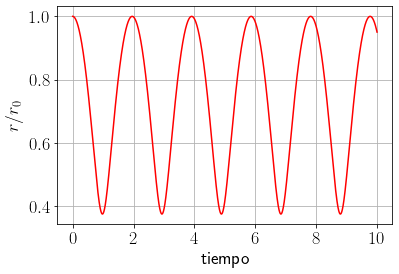

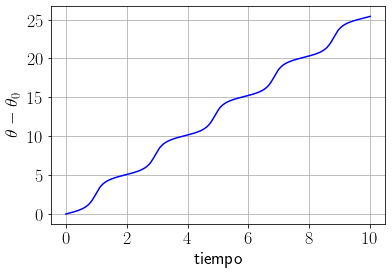

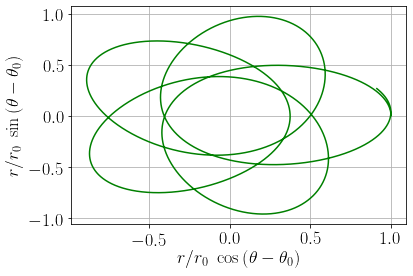

In [99]:
# Constantes del problema:
M1 = 3
M2 = 3
g = 9.81

# Condiciones iniciales del problema:
r0 = 2
r_punto0 = 0
tita0 = 0
tita_punto0 = 1

C1 = (M2*g)/(M1+M2) # Defino constantes utiles
C2 = (m1)/(M1+M2)
cond_iniciales = [r0, r_punto0, tita0, tita_punto0]

def derivada(X, t, c1, c2): # esto sería la f del caso { x' = f(x,t) }
    r, r_punto, tita, tita_punto = X
    deriv = [0, 0, 0, 0] # es como el vector columna de arriba pero en filado
    
    deriv[0] = r_punto # derivada de r
    deriv[1] = -c1 + c2*r*(tita_punto)**2 # r dos puntos
    deriv[2] = tita_punto # derivada de tita
    deriv[3] = -2*r_punto*tita_punto/r
    return deriv


def resuelvo_sistema(m1, m2, tmax = 20):
    t0 = 0
    c1 = (m2*g)/(m1+m2) # Defino constantes utiles
    c2 = (m1)/(m1+m2)
    t = np.arange(t0, tmax, 0.001)
    
    # aca podemos definirnos nuestro propio algoritmo de integracion
    # o bien usar el que viene a armado de scipy. 
    # Ojo que no es perfecto eh, a veces es mejor escribirlo uno
    out = odeint(derivada, cond_iniciales, t, args = (c1, c2,))

    return [t, out.T]

t, (r, rp, tita, titap) = resuelvo_sistema(M1, M2, tmax=10)

plt.figure()
plt.plot(t, r/r0, 'r')
plt.ylabel(r"$r / r_0$")
plt.xlabel(r"tiempo")
# plt.savefig("directorio/r_vs_t.pdf", dpi=300)

plt.figure()
plt.plot(t, tita-tita0, 'b')
plt.ylabel(r"$\theta - \theta_0$")
plt.xlabel(r"tiempo")
# plt.savefig("directorio/tita_vs_t.pdf", dpi=300)


plt.figure()
plt.plot(r*np.cos(tita-tita0)/r0, r*np.sin(tita-tita0)/r0, 'g')
plt.ylabel(r"$r/r_0\ \sin\left(\theta - \theta_0\right)$")
plt.xlabel(r"$r/r_0\ \cos\left(\theta - \theta_0\right)$")
# plt.savefig("directorio/trayectoria.pdf", dpi=300)

Todo muy lindo!!

Cómo podemos verificar si esto está andando ok igual? Porque hasta acá solo sabemos que dio razonable, pero el ojímetro no es una medida cuantitativa.

Una opción para ver que el algoritmo ande bien (y que no hay errores numéricos, y que elegimos un integrador apropiado **ojo con esto eh... te estoy mirando a vos, Runge-Kutta**), es ver si se conserva la energía.

Les recuerdo que la energía cinética del sistema es $K = \frac{1}{2} m_1 \left|\vec{v}_1 \right|^2 + \frac{1}{2} m_2 \left|\vec{v}_2 \right|^2$, cuidado con cómo se escribe cada velocidad, y que la energía potencial del sistema únicamente depende de la altura de la pelotita colgante.
Hace falta conocer la longitud $L$ de la cuerda para ver si se conserva la energía mecánica total? (Spoiler: No. Pero piensen por qué)

Les queda como ejercicio a ustedes verificar eso, y también pueden experimentar con distintos metodos de integración a ver qué pasa con cada uno, abajo les dejamos una ayudita para que prueben.

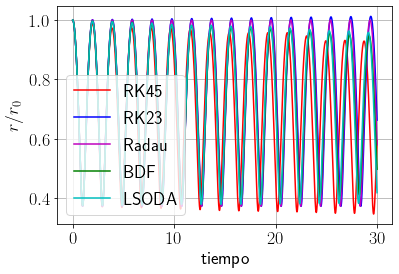

In [118]:
from scipy.integrate import solve_ivp

def resuelvo_sistema(m1, m2, tmax = 20, metodo='RK45'):
    t0 = 0
    c1 = (m2*g)/(m1+m2) # Defino constantes utiles
    c2 = (m1)/(m1+m2)
    t = np.arange(t0, tmax, 0.001)
    
    # acá hago uso de las lambda functions, solamente para usar 
    # la misma funcion que definimos antes. Pero como ahora
    # voy a usar otra funcion de integracion (no odeint)
    # que pide otra forma de definir la funcion, en vez de pedir
    # f(x,t) esta te pide f(t, x), entonces nada, hay que dar vuelta
    # parametros y nada mas...
    
    deriv_bis = lambda t, x: derivada(x, t, c1, c2)
    out = solve_ivp(fun=deriv_bis, t_span=(t0, tmax), y0=cond_iniciales,\
                   method=metodo, t_eval=t)

    return out

# Aca armo dos arrays con los metodos posibles y otro con colores
all_metodos = ['RK45', 'RK23', 'Radau', 'BDF', 'LSODA']
all_colores = ['r', 'b', 'm', 'g', 'c']

# Aca les dejo la forma piola de loopear sobre dos arrays a la par
for met, col in zip(all_metodos, all_colores):
    result = resuelvo_sistema(M1, M2, tmax=30, metodo=met)
    t = result.t
    r, rp, tita, titap = result.y
    plt.plot(t, r/r0, col, label=met)
    
plt.xlabel("tiempo")
plt.ylabel(r"$r / r_0$")
plt.legend(loc=3)

Ven cómo los distintos métodos van modificando más y más la curva de $r(t)$ a medida que van pasando los pasos de integración. Tarea para ustedes es correr el mismo código con la conservación de energía.

Cuál es mejor, por qué y cómo saberlo son preguntas que deberán hacerse e investigar si en algún momento trabajan con esto.

Por ejemplo, pueden buscar en Wikipedia "Symplectic Integrator" y ver  qué onda.

### Les dejamos también abajo la simulación de la trayectoria de la pelotita

<IPython.core.display.Javascript object>


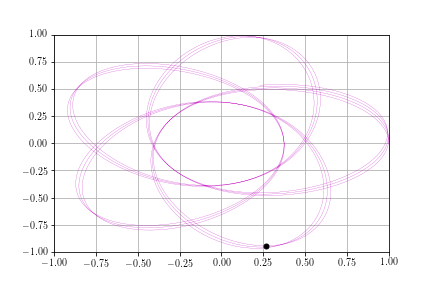

In [180]:
from matplotlib import animation
%matplotlib notebook

result = resuelvo_sistema(M1, M2, tmax=30, metodo='Radau')
t = result.t
r, rp, tita, titap = result.y

fig, ax = plt.subplots()
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.plot(r*np.cos(tita)/r0, r*np.sin(tita)/r0, 'm', lw=0.2)
line, = ax.plot([], [], 'ko', ms=5)

N_SKIP = 50
N_FRAMES = int(len(r)/N_SKIP)

def animate(frame_no):
    i = frame_no*N_SKIP
    r_i = r[i]/r0
    tita_i = tita[i]
    line.set_data(r_i*np.cos(tita_i), r_i*np.sin(tita_i))
    return line,
    
anim = animation.FuncAnimation(fig, animate, frames=N_FRAMES,
                           interval=50, blit=False)

Recuerden que esta animación no va a parar eh, sabemos que verla te deja en una especie de trance místico, pero recuerden pararla cuando haya transcurrido suficiente tiempo